## This script cannot be run on mybinder, since packages including `gganimate` and `gridExtra` are not available

In [1]:
# Uncomment this session to install packages 
# install.packages('ggplot2')
# install.packages('gapminder')
# install.packages('gganimate')
# install.packages('gifski')
# install.packages('av')
# install.packages('Rcpp')

In [2]:
library(ggplot2)
library(gganimate)
library(gridExtra)

No renderer backend detected. gganimate will default to writing frames to separate files
Consider installing:
- the `gifski` package for gif output
- the `av` package for video output
and restarting the R session



In [3]:
# Data generation
set.seed(1)
n=200; # 200 balls 
a=5; # 5 factor levels (colors)
b=5;

radius.mean=2*(2:(a+1)+ (6-b):5); 

#radius.mean=rep(3,r);  # What if we set the mean to be the same?
A<-rep(1:a,times=40)
B<-rep(1:b,each=40)

Y=2*(2*A+ 6-B)+rnorm(n,sd=1); # response Y

In [4]:
# Parameters for visualizations
T = 10; # frame number for animation
xyrange=6;
# x and y coordinates

coords.A=matrix(0,nrow=n,ncol=T);
coords.B=matrix(0,nrow=n,ncol=T)
coords.A[,1]= xyrange*runif(n);
coords.B[,1]= xyrange*runif(n);

coords.A[,T]= A + 0.8*(runif(n)-0.5);
coords.B[,T]= B + 0.8*(runif(n)-0.5);

for(i in 1:n){
    coords.A[i,]=seq(from=coords.A[i,1],to=coords.A[i,T],length.out=T)
    coords.B[i,]=seq(from=coords.B[i,1],to=coords.B[i,T],length.out=T)
    }


In [16]:
# Wrap these into a data.frame (in order to use ggplot2)
# Add a few plots at the end 
example.ANOVA<-data.frame(
    A=A,
    B=B,
    Y=Y,
    coords.A=coords.A[,1],
    coords.B=coords.B[,1],
    ID= 1:n,
    t= rep(1,n)
    )

for(l in 2:(T+6) ){
    tmp.ANOVA<-data.frame(
    A=A,
    B=B,
    Y=Y,
    coords.A=coords.A[,1],
    coords.B=coords.B[,1],
    ID= 1:n,
    t= rep(l,n)
    )
    k=l
    if(l>T){
        k=T
        }
    tmp.ANOVA$coords.A<-coords.A[,k]
    tmp.ANOVA$coords.B<-coords.B[,k]
    example.ANOVA<-rbind(example.ANOVA,tmp.ANOVA)
    }


In [22]:
# variance estimate:

var.all=var(Y) 

ssto= sum((Y-mean(Y))^2)

var.all - ssto/(n-1)

[1] 0

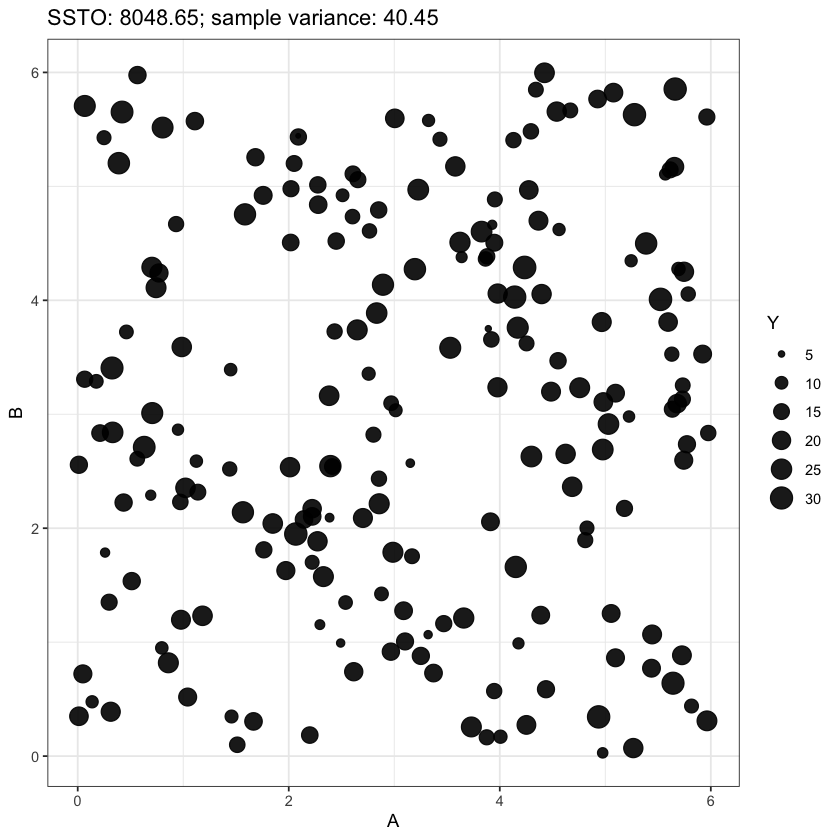

In [24]:
# Visualize the data with variance estimate:

tmp.data<-example.ANOVA[example.ANOVA$t==1,]
ggplot(tmp.data, aes(coords.A, coords.B, size = Y)) +
  geom_point(alpha = 0.9) +  
  labs(title = paste('SSTO: ', round(ssto,2), '; Sample variance: ', round(var.all,2),sep='') , 
       x = 'A', y = 'B') +
  theme_bw() 


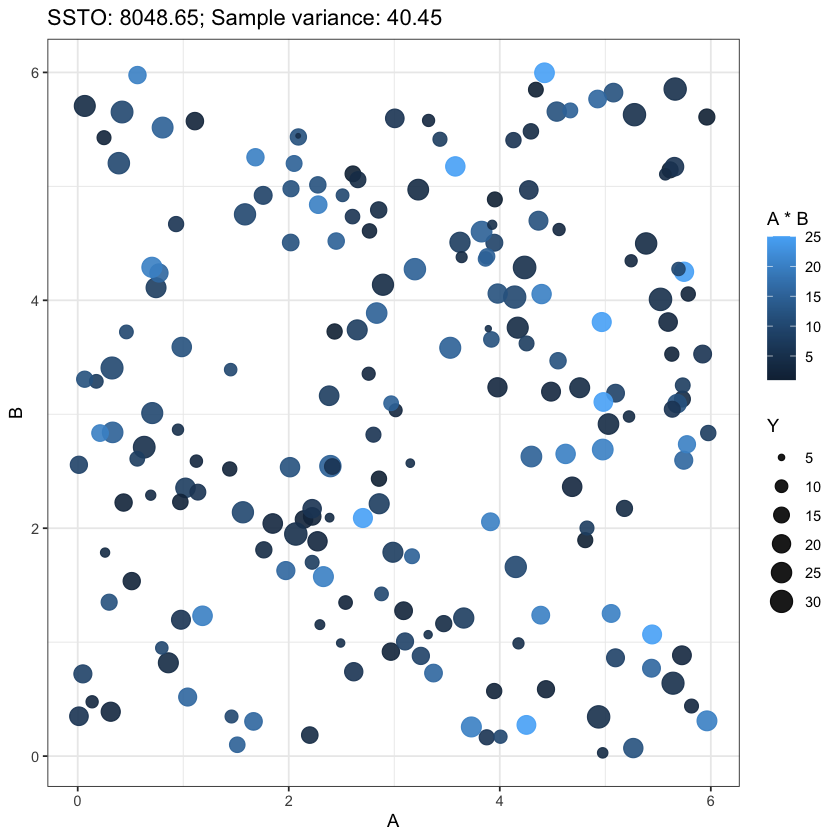

In [26]:
# Visualize the data with colors by X

tmp.data<-example.ANOVA[example.ANOVA$t==1,]
ggplot(tmp.data, aes(coords.A, coords.B, size = Y,color=A*B)) +
  geom_point(alpha = 0.9) +  
  labs(title = paste('SSTO: ', round(ssto,2), '; Sample variance: ', round(var.all,2),sep='') , 
       x = 'A', y = 'B') +
  theme_bw() 

  

In [33]:
install.packages('plotly')
library(plotly)

also installing the dependencies ‘later’, ‘lazyeval’, ‘crosstalk’, ‘promises’





The downloaded binary packages are in
	/var/folders/7k/pmrkdmm532g7zc20cgygtd4w0000gn/T//Rtmp97U1io/downloaded_packages



Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout




In [34]:

# Animation

options(repr.plot.width=8, repr.plot.height=8)
ggplot(example.ANOVA, aes(coords.A, coords.B, size = Y,color=A*B)) +
  geom_point(alpha = 0.9) +
  theme_bw() +
  # gganimate specific bits:
  labs(title = paste('SSTO: ', round(ssto,2), '; Sample variance: ', round(var.all,2),sep='') , 
       x = 'A', y = 'B') +
  transition_time(t) +
  ease_aes('linear')



anim_save("../Figures/anova-sorting.gif")


Rendering [=>-------------------------------------------] at 18 fps ~ eta:  5s

Rendering [==>------------------------------------------] at 18 fps ~ eta:  5s

Rendering [===>-----------------------------------------] at 18 fps ~ eta:  5s

Rendering [====>----------------------------------------] at 18 fps ~ eta:  5s

Rendering [=====>---------------------------------------] at 18 fps ~ eta:  5s

Rendering [======>--------------------------------------] at 18 fps ~ eta:  5s

Rendering [=======>-------------------------------------] at 18 fps ~ eta:  5s

Rendering [========>------------------------------------] at 18 fps ~ eta:  5s

Rendering [========>------------------------------------] at 18 fps ~ eta:  4s

Rendering [=========>-----------------------------------] at 18 fps ~ eta:  4s

Rendering [==========>----------------------------------] at 18 fps ~ eta:  4s

Rendering [===========>---------------------------------] at 18 fps ~ eta:  4s

Rendering [============>---------------

  [1] "./gganim_plot0001.png" "./gganim_plot0002.png" "./gganim_plot0003.png"
  [4] "./gganim_plot0004.png" "./gganim_plot0005.png" "./gganim_plot0006.png"
  [7] "./gganim_plot0007.png" "./gganim_plot0008.png" "./gganim_plot0009.png"
 [10] "./gganim_plot0010.png" "./gganim_plot0011.png" "./gganim_plot0012.png"
 [13] "./gganim_plot0013.png" "./gganim_plot0014.png" "./gganim_plot0015.png"
 [16] "./gganim_plot0016.png" "./gganim_plot0017.png" "./gganim_plot0018.png"
 [19] "./gganim_plot0019.png" "./gganim_plot0020.png" "./gganim_plot0021.png"
 [22] "./gganim_plot0022.png" "./gganim_plot0023.png" "./gganim_plot0024.png"
 [25] "./gganim_plot0025.png" "./gganim_plot0026.png" "./gganim_plot0027.png"
 [28] "./gganim_plot0028.png" "./gganim_plot0029.png" "./gganim_plot0030.png"
 [31] "./gganim_plot0031.png" "./gganim_plot0032.png" "./gganim_plot0033.png"
 [34] "./gganim_plot0034.png" "./gganim_plot0035.png" "./gganim_plot0036.png"
 [37] "./gganim_plot0037.png" "./gganim_plot0038.png" "./gganim_

ERROR: [1m[33mError[39m in `save_animation()`:[22m
[1m[22m[33m![39m The animation object does not specify a save_animation method


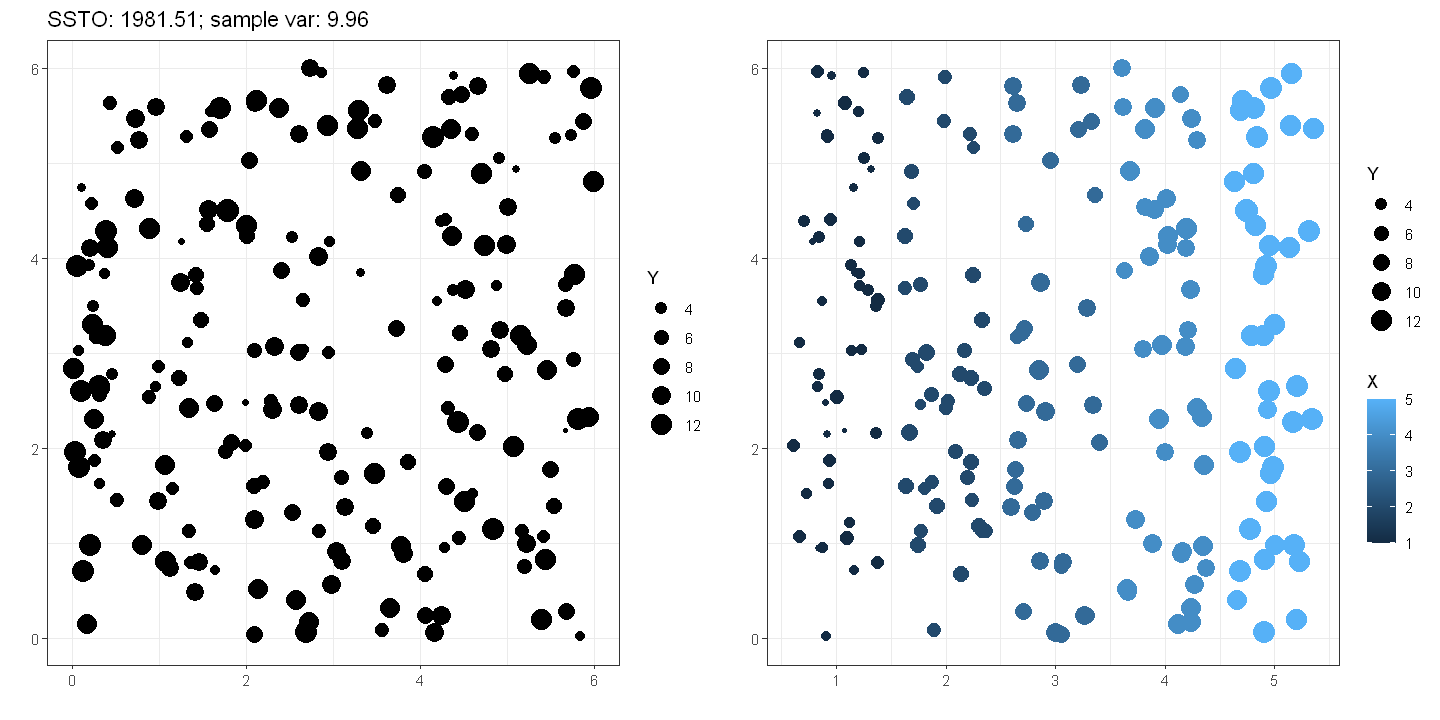

In [12]:
###### Visualize the data side by side 



options(repr.plot.width=12, repr.plot.height=6)
tmp1.data<-example.ANOVA[example.ANOVA$t==1,]
plot1<-ggplot(tmp1.data, aes(coords.x, coords.y, size = Y)) +
  geom_point() +
  labs(title = paste('SSTO: ', round(ssto,2), '; sample var: ', round(var.all,2),sep='') , x = '', y = '') +
  theme_bw() 
  

tmpT.data<-example.ANOVA[example.ANOVA$t==T,]
plotT=ggplot(tmpT.data, aes(coords.x, coords.y, size = Y,color=X)) +
  geom_point() +
  labs(title = '', x = '', y = '') +
  theme_bw() 
  


grid.arrange(plot1, plotT, ncol=2)

In [13]:
# Calculate the residual sum of squares and variance of the error terms

anova.fit=aov(Y~X)
anova.table=summary(anova.fit)

sse=anova.table[[1]][2,2]
mse=anova.table[[1]][2,3]
df.mse=n-2;
mse-sse/df.mse

[1] 0

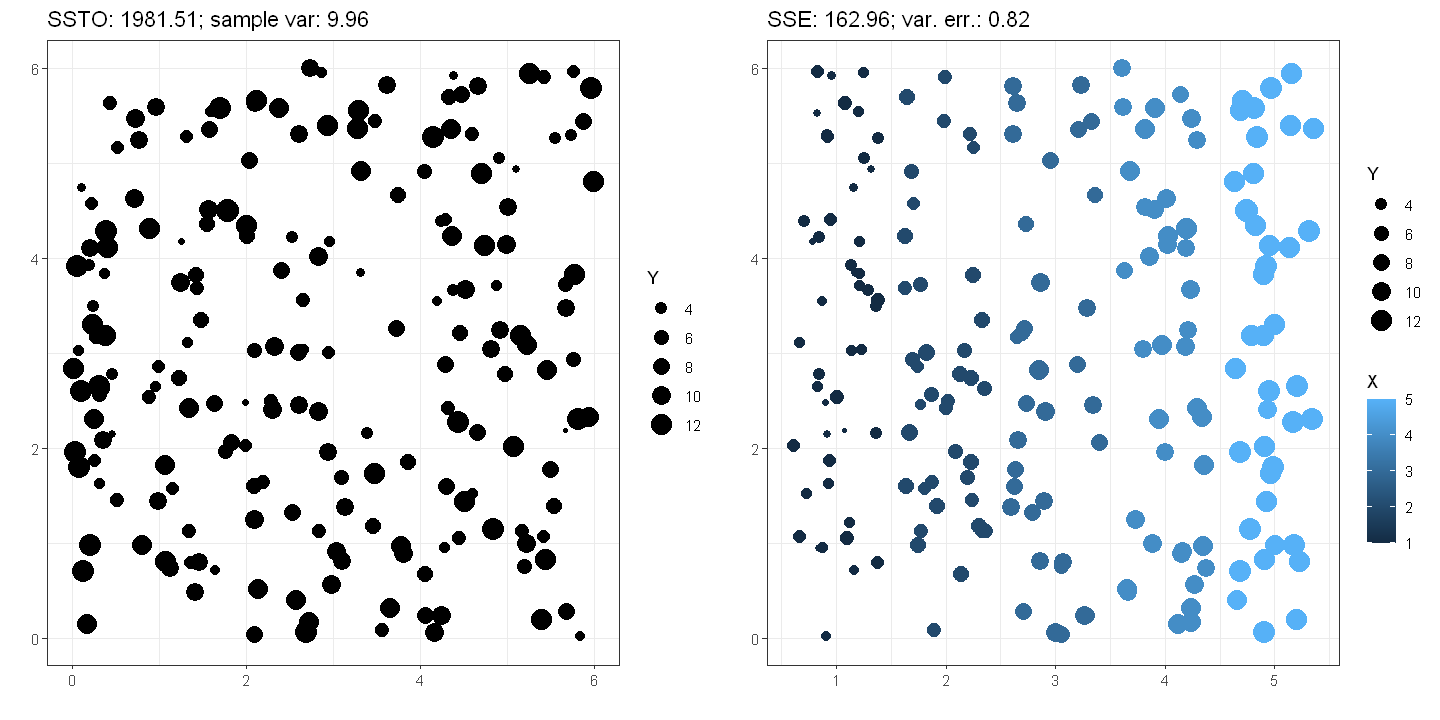

In [158]:
###### Visualize the data side by side 



options(repr.plot.width=12, repr.plot.height=6)
tmp1.data<-example.ANOVA[example.ANOVA$t==1,]
plot1<-ggplot(tmp1.data, aes(coords.x, coords.y, size = Y)) +
  geom_point() +
  labs(title = paste('SSTO: ', round(ssto,2), '; sample var: ', round(var.all,2),sep='') , x = '', y = '') +
  theme_bw() 
  

tmpT.data<-example.ANOVA[example.ANOVA$t==T,]
plotT=ggplot(tmpT.data, aes(coords.x, coords.y, size = Y,color=X)) +
  geom_point() +
   labs(title = paste('SSE: ', round(sse,2), '; var. err.: ', round(mse,2),sep='') , x = '', y = '') +
  theme_bw() 
  


grid.arrange(plot1, plotT, ncol=2)